In [79]:
import os
import itertools
import numpy as np
import pandas as pd
# PyTorch
import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
plt.rcParams.update({'font.size': 12})

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils as utils
import losses

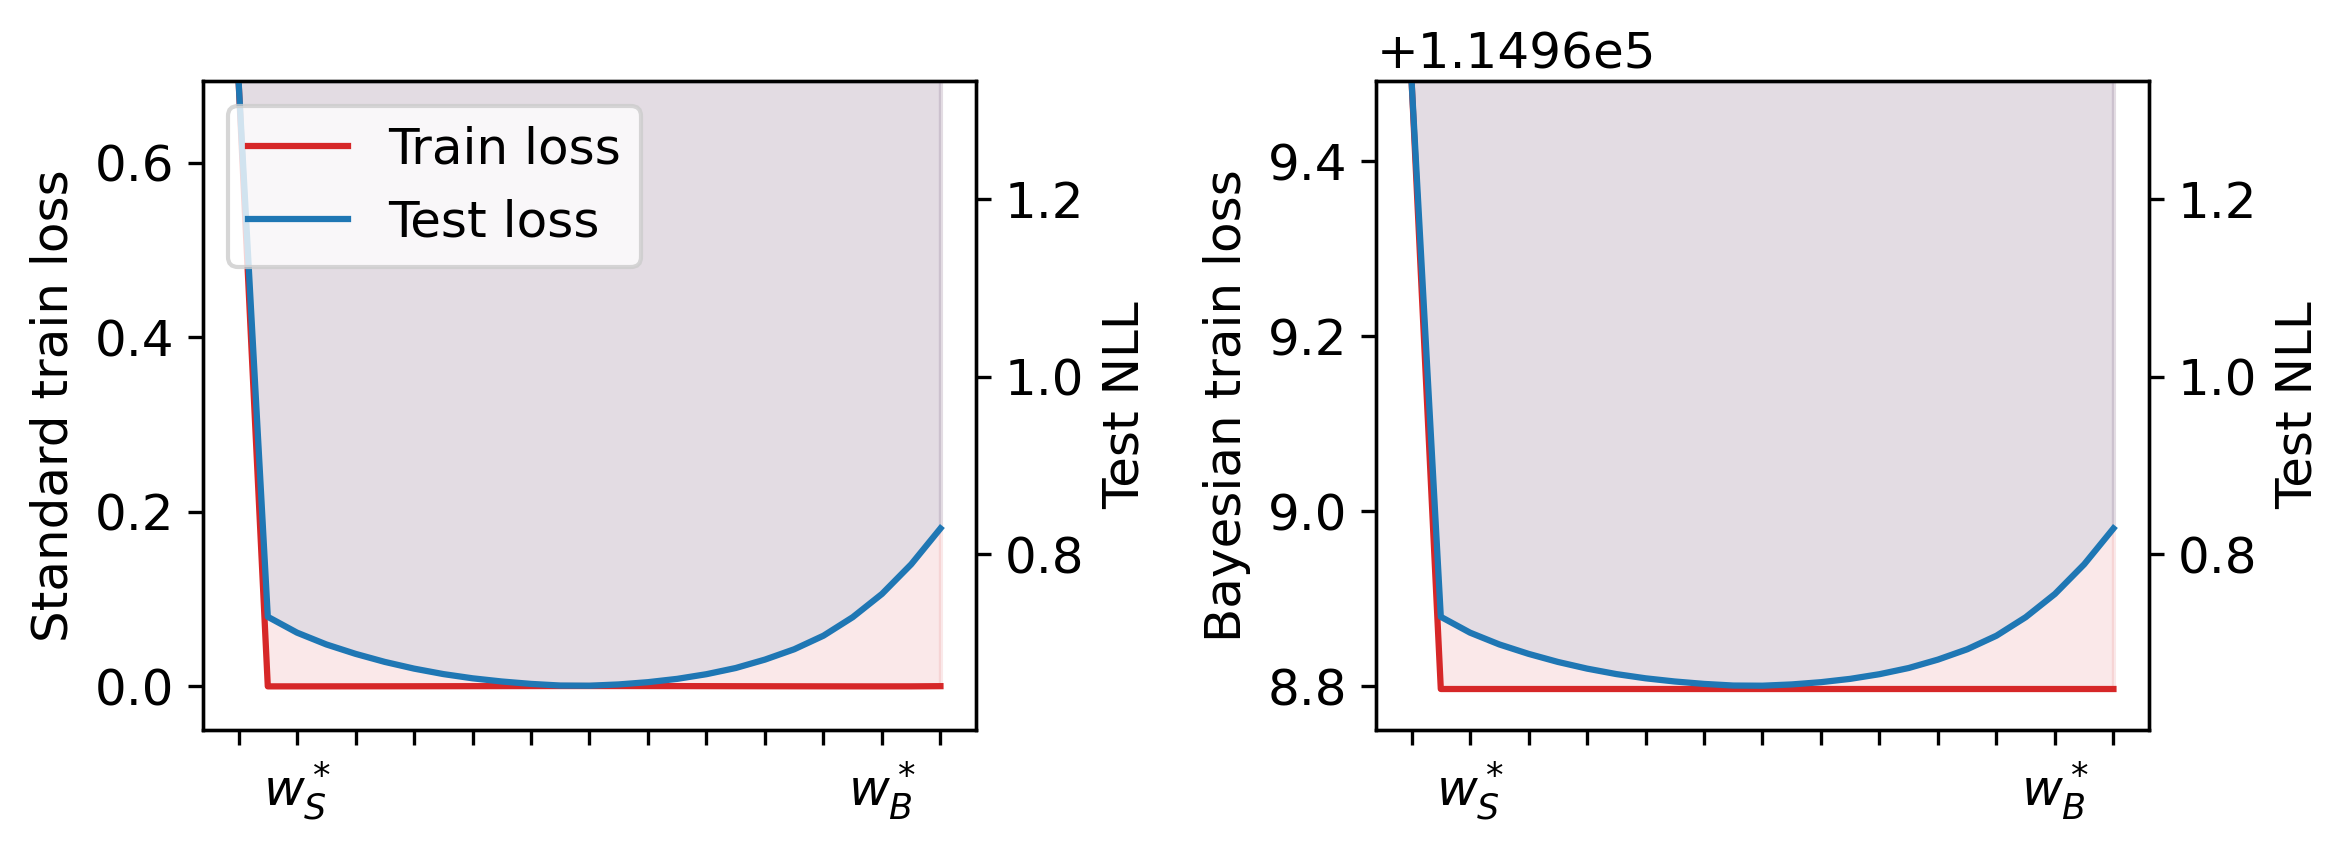

In [102]:
random_state = 1001
nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

ncols, nrows = 2, 1
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

ax[0].plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, color='#d62728', label='Train loss')
ax[0].fill_between(range(len(nonlearned_train_losses)), nonlearned_train_losses, torch.max(nonlearned_train_losses), color='#d62728', alpha=0.1)
twin_ax0 = ax[0].twinx()
twin_ax0.plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, color='#1f77b4', label='Test loss')
twin_ax0.fill_between(range(len(nonlearned_test_losses)), nonlearned_test_losses, torch.max(nonlearned_test_losses), color='#1f77b4', alpha=0.1)
twin_ax0.set_ylim([min(nonlearned_test_losses)-0.05, min(max(nonlearned_test_losses), min(nonlearned_test_losses)+1)])

ax[1].plot(range(len(learned_train_losses)), learned_train_losses, color='#d62728')
ax[1].fill_between(range(len(learned_train_losses)), learned_train_losses, torch.max(learned_train_losses), color='#d62728', alpha=0.1)
twin_ax1 = ax[1].twinx()
twin_ax1.plot(range(len(learned_test_losses)), learned_test_losses, color='#1f77b4')
twin_ax1.fill_between(range(len(learned_test_losses)), learned_test_losses, torch.max(learned_test_losses), color='#1f77b4', alpha=0.1)
twin_ax1.set_ylim([min(learned_test_losses)-0.05, min(max(learned_test_losses), min(learned_test_losses)+1)])

ax[0].set_xticks(np.linspace(0, 24, num=13))
ax[0].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
ax[0].set_ylim([min(nonlearned_train_losses)-0.05, min(max(nonlearned_train_losses), min(nonlearned_train_losses)+1)])
ax[0].set_ylabel('Standard train loss')
twin_ax0.set_ylabel('Test NLL')

ax[1].set_xticks(np.linspace(0, 24, num=13))
ax[1].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
ax[1].set_ylim([min(learned_train_losses)-0.05, min(max(learned_train_losses), min(learned_train_losses)+1)])
ax[1].set_ylabel('Bayesian train loss')
twin_ax1.set_ylabel('Test NLL')

fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax[0].transAxes)
fig.tight_layout()
plt.savefig('interpolation_random_state={}.pdf'.format(random_state))
plt.show()

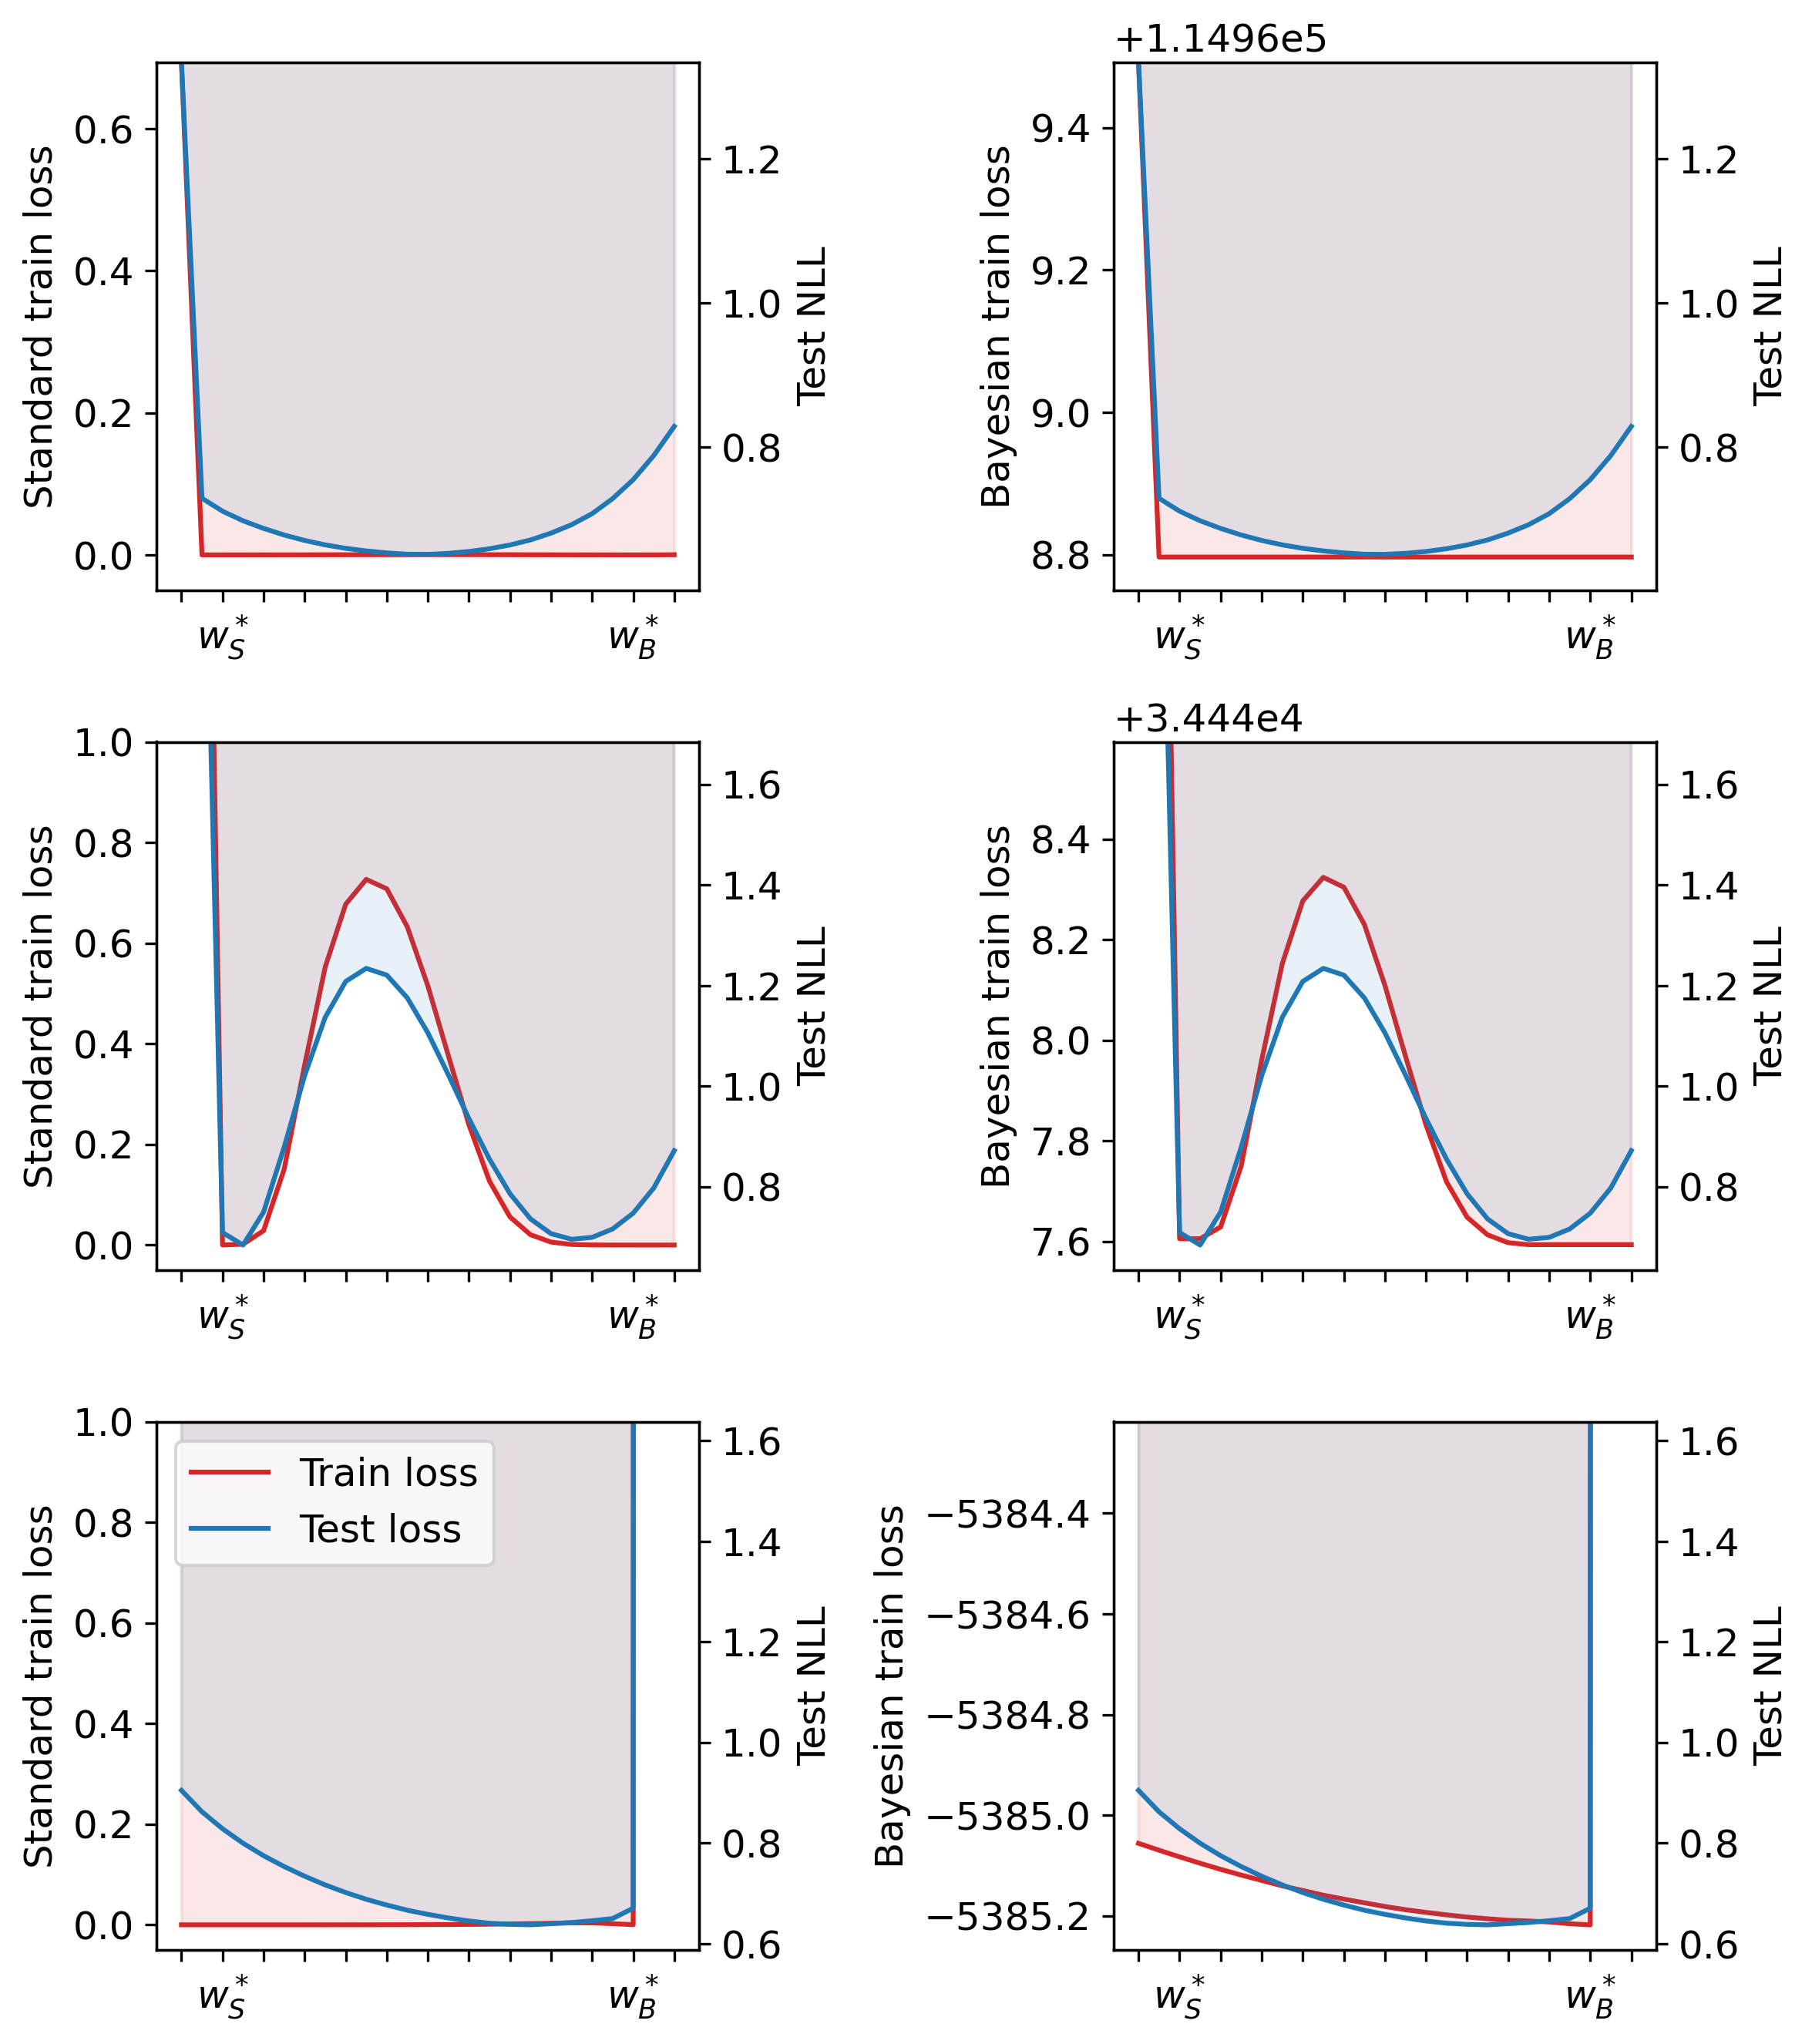

In [103]:
ncols, nrows = 2, 3
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4*ncols, 3*nrows), dpi=300)

for index, (random_state, train_label, test_label) in enumerate(zip([1001, 2001, 3001], ['Train loss', None, None], ['Test loss', None, None])):
    
    nonlearned_train_losses = torch.load('./nonlearned_train_interpolation_random_state={}.pth'.format(random_state))
    nonlearned_test_losses = torch.load('./nonlearned_test_interpolation_random_state={}.pth'.format(random_state))
    learned_train_losses = torch.load('./learned_train_interpolation_random_state={}.pth'.format(random_state))
    learned_test_losses = torch.load('./learned_test_interpolation_random_state={}.pth'.format(random_state))

    ax[index,0].plot(range(len(nonlearned_train_losses)), nonlearned_train_losses, color='#d62728', label=train_label)
    ax[index,0].fill_between(range(len(nonlearned_train_losses)), nonlearned_train_losses, torch.max(nonlearned_train_losses), color='#d62728', alpha=0.1)
    twin_ax0 = ax[index,0].twinx()
    twin_ax0.plot(range(len(nonlearned_test_losses)), nonlearned_test_losses, color='#1f77b4', label=test_label)
    twin_ax0.fill_between(range(len(nonlearned_test_losses)), nonlearned_test_losses, torch.max(nonlearned_test_losses), color='#1f77b4', alpha=0.1)
    twin_ax0.set_ylim([min(nonlearned_test_losses)-0.05, min(max(nonlearned_test_losses), min(nonlearned_test_losses)+1)])

    ax[index,1].plot(range(len(learned_train_losses)), learned_train_losses, color='#d62728')
    ax[index,1].fill_between(range(len(learned_train_losses)), learned_train_losses, torch.max(learned_train_losses), color='#d62728', alpha=0.1)
    twin_ax1 = ax[index,1].twinx()
    twin_ax1.plot(range(len(learned_test_losses)), learned_test_losses, color='#1f77b4')
    twin_ax1.fill_between(range(len(learned_test_losses)), learned_test_losses, torch.max(learned_test_losses), color='#1f77b4', alpha=0.1)
    twin_ax1.set_ylim([min(learned_test_losses)-0.05, min(max(learned_test_losses), min(learned_test_losses)+1)])

    ax[index,0].set_xticks(np.linspace(0, 24, num=13))
    ax[index,0].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
    ax[index,0].set_ylim([min(nonlearned_train_losses)-0.05, min(max(nonlearned_train_losses), min(nonlearned_train_losses)+1)])
    ax[index,0].set_ylabel('Standard train loss')
    twin_ax0.set_ylabel('Test NLL')
    
    ax[index,1].set_xticks(np.linspace(0, 24, num=13))
    ax[index,1].set_xticklabels(['', r'$w_{S}^*$', '', '', '', '', '', '', '', '', '', r'$w_{B}^*$', ''])
    ax[index,1].set_ylim([min(learned_train_losses)-0.05, min(max(learned_train_losses), min(learned_train_losses)+1)])
    ax[index,1].set_ylabel('Bayesian train loss')
    twin_ax1.set_ylabel('Test NLL')

fig.legend(loc='upper left', bbox_to_anchor=(0,1), bbox_transform=ax[-1,0].transAxes)
fig.tight_layout()    
plt.savefig('interpolations.pdf')
plt.show()